<a href="https://colab.research.google.com/github/joshtburdick/misc/blob/master/plog/FermatFactoringVariation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A variation on Fermat's factoring method

This is a variation on [Fermat's factoring method](https://en.wikipedia.org/wiki/Fermat%27s_factorization_method),
which tries to write a number $N$ as a difference of squares $N = a^2 - b^2$.

However, here, rather than requiring this to be exact, we only require to be true modulo a product of small primes $m = \prod p_i$.
It's not obvious that trying to solve these separately makes for an easier problem.

Here, we *only* ask ask the question:

For a given set of small primes $p_i$, suppose we wish to factor $N$ (which is less than $m = \prod p_i$). Suppose we find $a$ and $b$ such that, for all $i$,

$a^2 - b^2 \equiv N   ({\rm mod} p_i)$

How often is it the case that any of $a+b$, $a-b$, or $b-a$ shares a
common factor (other than 1) with $N$?

(As a quick check, pasting that into "Generate"; here's what I get.)




In [57]:
# prompt: This is a variation on Fermat's factoring method. It tries to write a number  𝑁  as a difference of squares  𝑁=𝑎2−𝑏2 .
# However, here, rather than requiring this to be exact, we only require to be true modulo a product of small primes  𝑚=∏𝑝𝑖 . It's not obvious that trying to solve these separately makes for an easier problem.
# Here, we only ask ask the question:
# For a given set of small primes  𝑝𝑖 , suppose we wish to factor  𝑁  (which is less than  𝑚=∏𝑝𝑖 ). Suppose we find  𝑎  and  𝑏  such that, for all  𝑖 ,
# 𝑎2−𝑏2≅𝑁(mod𝑝𝑖)
# How often is it the case that any of  𝑎+𝑏 ,  𝑎−𝑏 , or  𝑏−𝑎  shares a common factor (other than 1) with  𝑁 ?

def has_common_factor(N, a, b):
  """Checks if a+b, a-b, or b-a share a common factor with N.

  Args:
    N: The number to factor.
    a: One of the integers in the difference of squares.
    b: The other integer in the difference of squares.

  Returns:
    True if there is a common factor, False otherwise.
  """
  import math

  if math.gcd(abs(a + b), N) > 1:
    return True
  if math.gcd(abs(a - b), N) > 1:
    return True
  if math.gcd(abs(b - a), N) > 1:
    return True
  return False

In [58]:
import math
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas
import random

In [59]:
# prompt: Get the first few hundred prime numbers. Feel free to use whatever Python libraries simplify this.

!pip install sympy

from sympy import primerange

primes = list(primerange(2, 1230)) # Get primes up to roughly the first 2000, as the 200th prime is 1223.
primes

# how many primes is this?
len(primes)
# ...close enough

201

First, for a given set of primes, we find the members of the multiplicative group.



In [60]:
# prompt: Given a list of primes whose product is m, get the numbers in 1..m which are members of the multiplicative group.

def multiplicative_group_members(primes):
  """Gets the numbers in 1..m which are members of the multiplicative group.

  Args:
    primes: A list of prime numbers.

  Returns:
    A list of numbers in 1..m that are members of the multiplicative group,
    where m is the product of the primes.
  """
  m = math.prod(primes)
  members = []
  for num in range(1, m + 1):
    is_member = True
    for p in primes:
      if math.gcd(num, p) != 1:
        is_member = False
        break
    if is_member:
      members.append(num)
  return members

# Example usage:
# m_members = multiplicative_group_members(primes)
# print(m_members)

(This works. However, it might be faster to either check if any `p` in `primes` divides `num`, or check `math.gcd(num, m)!=1`. Admittedly, I'm not sure which of these would be faster.)

In [73]:
# prompt: Write a function which is given a list `p` of primes, and first computes their product, `m`, and the elements of 1..m which form a multiplicative group.
# It should then sample numbers N, which are a product of exactly two primes, and use sampling to find pairs `a` and `b` such that a^2-b^2 = N (mod m).
# For each of these, it should then check whether N and _any_ of a+b, a-b, or b-a share a common factor.
# It should expect "number of samples" as an argument. It should return a list of, for each sample:
# - N
# - a, b

def solve_and_check_common_factors(p, num_samples):
    """
    Samples numbers N (product of two primes) and finds pairs (a, b)
    such that a^2 - b^2 = N (mod m), then checks for common factors.

    Args:
        p: A list of prime numbers.
        num_samples: The number of samples to take.

    Returns:
        A list of tuples, where each tuple contains (N, (a, b)).
    """
    m = math.prod(p)
    m_members = multiplicative_group_members(p)

    results = []

    # Create a list of possible two-prime products within a reasonable range
    possible_Ns = []
    primes1 = [p for p in primes if p!=2 and p<math.sqrt(m+1)]
    for i in range(len(primes)):
        for j in range(i, len(primes)):
            n = primes[i] * primes[j]
            if n < m: # Ensure N is less than m for modulo operations
                possible_Ns.append(n)

    for _ in range(num_samples):
        # Randomly sample an N which is a product of two primes
        N = random.choice(possible_Ns)
        if N >= m:
          continue
        num_congruent = 0
        num_with_common_factor = 0
        for _ in range(100000): # Try random pairs of a and b
            a = random.choice(m_members)
            b = random.choice(m_members)
            # Check if a^2 - b^2 = N (mod m)
            if (a**2 - b**2) % m == N % m:
              num_congruent += 1
              if has_common_factor(N, a, b):
                num_with_common_factor += 1
        results.append({"m": m, "N": N,
                        "num_congruent": num_congruent,
                        "num_with_common_factor": num_with_common_factor,
                        "p_common_factor": num_with_common_factor / num_congruent})


    return results

# Example usage:
p = [37,59]
sample_results = solve_and_check_common_factors(p, 100)
for x in sample_results:
  print(x)

{'m': 2183, 'N': 573, 'num_congruent': 54, 'num_with_common_factor': 29, 'p_common_factor': 0.5370370370370371}
{'m': 2183, 'N': 1046, 'num_congruent': 44, 'num_with_common_factor': 19, 'p_common_factor': 0.4318181818181818}
{'m': 2183, 'N': 1454, 'num_congruent': 39, 'num_with_common_factor': 24, 'p_common_factor': 0.6153846153846154}
{'m': 2183, 'N': 481, 'num_congruent': 94, 'num_with_common_factor': 94, 'p_common_factor': 1.0}
{'m': 2183, 'N': 1486, 'num_congruent': 38, 'num_with_common_factor': 24, 'p_common_factor': 0.631578947368421}
{'m': 2183, 'N': 1769, 'num_congruent': 41, 'num_with_common_factor': 3, 'p_common_factor': 0.07317073170731707}
{'m': 2183, 'N': 141, 'num_congruent': 38, 'num_with_common_factor': 20, 'p_common_factor': 0.5263157894736842}
{'m': 2183, 'N': 202, 'num_congruent': 51, 'num_with_common_factor': 25, 'p_common_factor': 0.49019607843137253}
{'m': 2183, 'N': 415, 'num_congruent': 53, 'num_with_common_factor': 25, 'p_common_factor': 0.4716981132075472}
{'m

We now plot how often a common factor is found.

<Axes: xlabel='N', ylabel='p_common_factor'>

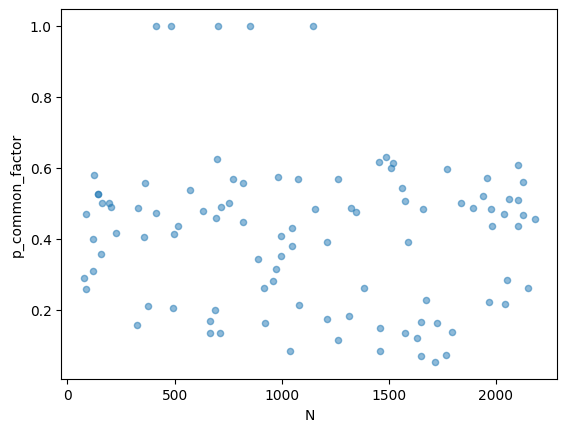

In [74]:
sample_results = pandas.DataFrame(sample_results)
sample_results.plot.scatter(x='N', y='p_common_factor', alpha=0.5)